<a href="https://colab.research.google.com/github/EliFishykins23/Python-Simple-Linear-Regressions/blob/main/Outbound_Deliveries_Custom_Predictions_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
New Delivery Times: [ 5 10]
Predicted Distances: [3058.50193109 3137.25516889]


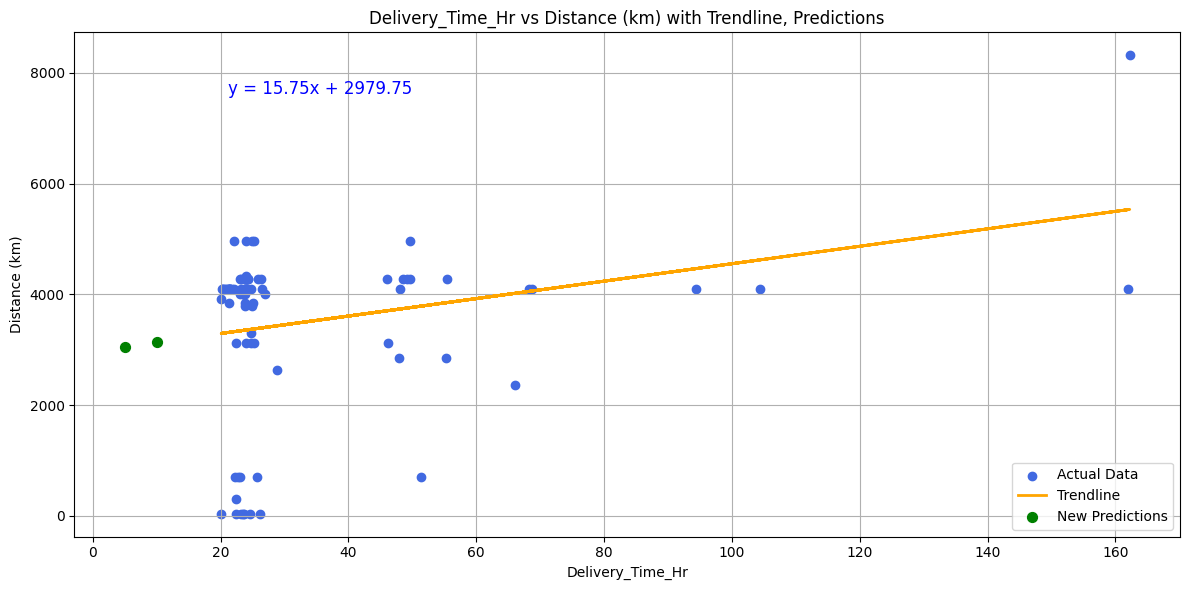

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Mount Google Drive (To Make Cloud Storage Drive Appear as a Local Drive):
from google.colab import drive
drive.mount('/content/drive')

# Read Excel File Path in Google Drive:
file_path = '/content/drive/My Drive/Data_Anayltics/Simple Linear Regression_Outgoing Deliveries.xlsx'
df = pd.read_excel(file_path)

# Define X and Y
X = df[['Delivery_Time_Hr']]
y = df['Distance (km)']

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predict for Training Data (trendline) - [Added]
y_pred = model.predict(X)

# Predict for new Delivery_Time_Hr values - [Added]
new_times = pd.DataFrame(new_times, columns=X.columns) # Convert to DataFrame with feature names - [Adjusted]
predicted_distances = model.predict(new_times)

# Print New Predictions - [Added]
print("New Delivery Times:", new_times.values.flatten()) # - [Adjusted & Added (.values) ]
print("Predicted Distances:", predicted_distances)

# Plot
plt.figure(figsize=(12, 6))

# Scatter of actual data
plt.scatter(X, y, color='royalblue', label='Actual Data')

# Regression line
plt.plot(X, y_pred, color='orange', linewidth=2, label='Trendline')

# New predictions - [Added]
plt.scatter(new_times, predicted_distances, color='green', s=50, label='New Predictions')

# Safe min/max for plotting text: - (To Prevent Outliers) - [Added]
x_min = X.min()
if hasattr(x_min, 'iloc'):
    x_min = x_min.iloc[0]

y_max = y.max()
if hasattr(y_max, 'iloc'):
    y_max = y_max.iloc[0]

# Regression equation - [Added]
slope = model.coef_[0]
intercept = model.intercept_
eq_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(x_min + 1, y_max - 700, eq_text, fontsize=12, color='blue')


plt.title('Delivery_Time_Hr vs Distance (km) with Trendline, Predictions')
plt.xlabel('Delivery_Time_Hr')
plt.ylabel('Distance (km)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()